In [110]:
import sklearn
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing

dataset=fetch_california_housing()

df=pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset['target']

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2=df.copy() #copy the dataframe

#scale population column
df2['Population']= scaler.fit_transform(df2['Population'].values.reshape(-1,1))

df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422


In [112]:
#standard scaling
df3=df.copy()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df3['Population']=scaler.fit_transform(df3['Population'].values.reshape(-1,1))

df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422


In [113]:
#convert to 2dp

df3['Population']=np.round(df3['Population'],2)

df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,-0.97,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.86,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.82,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.77,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.76,2.181467,37.85,-122.25,3.422


In [114]:
corr_matrix=df.corr()

corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


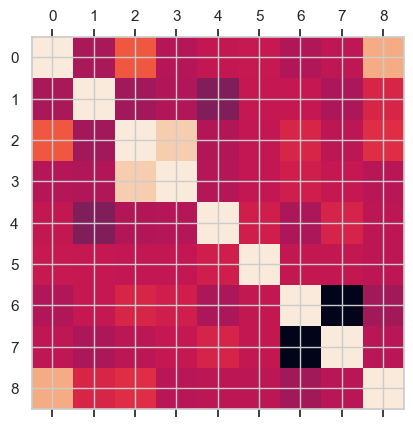

In [115]:
import matplotlib.pyplot as plt

plt.matshow(corr_matrix)

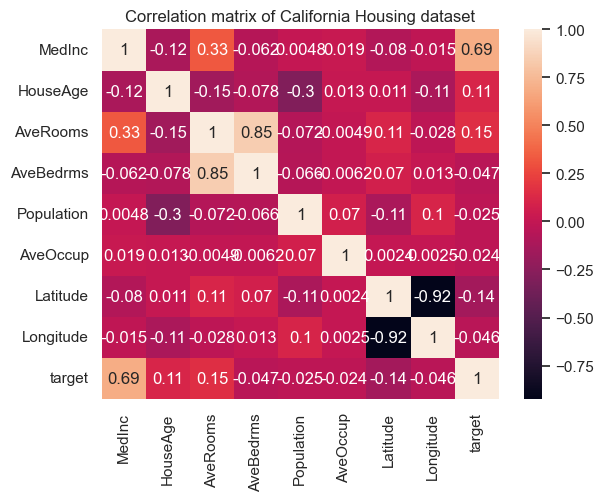

In [116]:
#use heatmap visualisation
import seaborn as sns

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix of California Housing dataset')
plt.show()

In [117]:
df3['new']=df3['MedInc']*df3['AveRooms']
df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,new
0,8.3252,41.0,6.984127,1.023810,-0.97,2.555556,37.88,-122.23,4.526,58.144254
1,8.3014,21.0,6.238137,0.971880,0.86,2.109842,37.86,-122.22,3.585,51.785271
2,7.2574,52.0,8.288136,1.073446,-0.82,2.802260,37.85,-122.24,3.521,60.150315
3,5.6431,52.0,5.817352,1.073059,-0.77,2.547945,37.85,-122.25,3.413,32.827897
4,3.8462,52.0,6.281853,1.081081,-0.76,2.181467,37.85,-122.25,3.422,24.161264


In [118]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [119]:
import math
df3['target']=(np.floor(df3['target'])).astype(int)

freqs=df3['target'].value_counts()
freqs



1    8289
2    4889
0    3596
3    2095
5     992
4     779
Name: target, dtype: int64

In [120]:
df3['HouseAge'].max()

52.0

In [121]:
#segment house age into new, old and very old

df3['HouseAgeCat']=pd.cut(bins=[0,10,30,60],labels=['New','Old','Very Old'],x=df3['HouseAge'])


In [122]:
#apply one hot encoding to add 3 columns
encoded_columns=pd.get_dummies(df3['HouseAgeCat'])
print(encoded_columns)

df3=pd.concat([df3,encoded_columns],axis=1)
df3.tail(20)

       New  Old  Very Old
0        0    0         1
1        0    1         0
2        0    0         1
3        0    0         1
4        0    0         1
...    ...  ...       ...
20635    0    1         0
20636    0    1         0
20637    0    1         0
20638    0    1         0
20639    0    1         0

[20640 rows x 3 columns]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,new,HouseAgeCat,New,Old,Very Old
20620,4.5625,40.0,4.125000,0.854167,-1.13,3.145833,39.05,-121.48,1,18.820312,Very Old,0,0,1
20621,2.3661,37.0,7.923567,1.573248,-0.83,3.082803,39.01,-121.47,0,18.747952,Very Old,0,0,1
20622,2.4167,20.0,4.808917,0.936306,-0.86,2.910828,39.00,-121.44,0,11.621710,Old,0,1,0
20623,2.8235,32.0,5.101322,1.074890,-0.73,2.634361,39.03,-121.37,0,14.403581,Very Old,0,0,1
20624,3.0739,16.0,5.835052,1.030928,-0.61,2.512027,39.04,-121.41,0,17.936365,Old,0,1,0
20625,4.1250,37.0,7.285714,1.214286,-1.23,2.071429,39.12,-121.52,0,30.053571,Very Old,0,0,1
20626,2.1667,36.0,6.573099,1.076023,-0.81,2.947368,39.18,-121.43,0,14.241935,Very Old,0,0,1
20627,3.0000,5.0,6.067797,1.101695,-1.11,2.864407,39.13,-121.32,1,18.203390,New,1,0,0
20628,2.5952,19.0,5.238462,1.079487,-0.36,2.610256,39.10,-121.48,0,13.594855,Old,0,1,0
20629,2.0943,28.0,5.519802,1.020902,4.84,3.801980,39.12,-121.39,1,11.560121,Old,0,1,0


In [123]:
df4=df3[['target','New','Old','Very Old']]
data=df4.groupby('target').sum()
data

,New,Old,Very Old
target,,,
0,179.0,1791.0,1626.0
1,800.0,3856.0,3633.0
2,344.0,2379.0,2166.0
3,144.0,936.0,1015.0
4,55.0,278.0,446.0
5,47.0,336.0,609.0


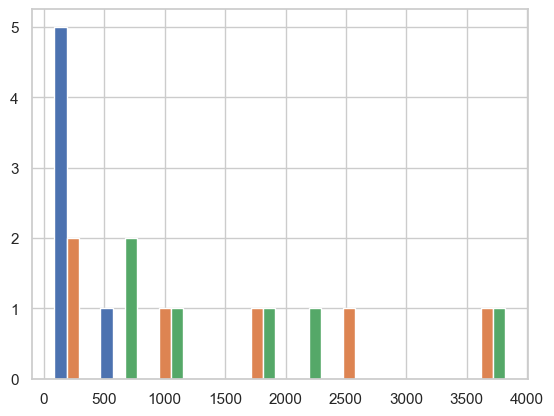

In [124]:
#plot the data using histogram
plt.hist(data)
plt.show()

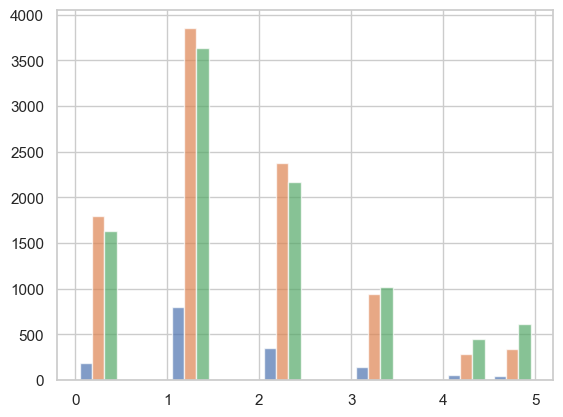

In [125]:
new_properties=df4[df4['New']==1]
old_properties=df4[df4['Old']==1]
very_old_properties=df4[df4['Very Old']==1]
plt.hist([new_properties['target'], old_properties['target'], very_old_properties['target']], label=['New', 'Old', 'Very Old'], alpha=0.7)
plt.show()

In [128]:
df4.columns

Index(['target', 'New', 'Old', 'Very Old'], dtype='object')

In [129]:
df3['MedInc'].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: MedInc, Length: 12928, dtype: int64

In [133]:
df3['binned_income']=pd.cut(df3['MedInc'], bins=[0,2,4,6,8,50],labels=['0-2','2-4','4-6','6-8','8+'])
df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,new,HouseAgeCat,New,Old,Very Old,binned_income
0,8.3252,41.0,6.984127,1.023810,-0.97,2.555556,37.88,-122.23,4,58.144254,Very Old,0,0,1,8+
1,8.3014,21.0,6.238137,0.971880,0.86,2.109842,37.86,-122.22,3,51.785271,Old,0,1,0,8+
2,7.2574,52.0,8.288136,1.073446,-0.82,2.802260,37.85,-122.24,3,60.150315,Very Old,0,0,1,6-8
3,5.6431,52.0,5.817352,1.073059,-0.77,2.547945,37.85,-122.25,3,32.827897,Very Old,0,0,1,4-6
4,3.8462,52.0,6.281853,1.081081,-0.76,2.181467,37.85,-122.25,3,24.161264,Very Old,0,0,1,2-4


In [135]:
grouped=df3.groupby('binned_income')['target'].mean()
grouped

binned_income
0-2    0.575906
2-4    1.165808
4-6    1.954760
6-8    2.994617
8+     4.413043
Name: target, dtype: float64

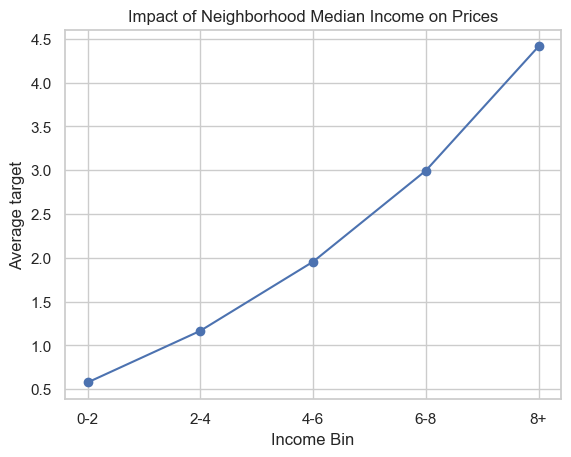

In [138]:
plt.title('Impact of Neighborhood Median Income on Prices')
plt.ylabel('Average target')
plt.xlabel('Income Bin')
plt.plot(grouped,marker='o')
plt.show()